In [1]:
###  Rer.
#-- https://www.kaggle.com/luyujia/mnist-chainer-cnn/notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 'My Drive'の表記が出ていればマウントがうまく行われています。
# !ls 'drive/'
!ls 'drive/My Drive/jupyter/ProbSpace/ukiyoe/data/'

ukiyoe-test-imgs.npz  ukiyoe-train-imgs.npz  ukiyoe-train-labels.npz


In [0]:
##-- import library
import numpy as np 
import pandas as pd 
##-- Scikit-Learn
from sklearn.model_selection import train_test_split
##-- Matplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [4]:
###---  Data PATH  ---###
datapath = "drive/My Drive/jupyter/ProbSpace/ukiyoe/data/"

###-- Read Datasets
def load(f):
    return np.load(f)['arr_0']
X_original = load(datapath+"ukiyoe-train-imgs.npz")
Y_original = load(datapath+"ukiyoe-train-labels.npz")

###-- Shuffle dataset --###
from sklearn.utils import shuffle
X_original, Y_original = shuffle(X_original, Y_original, random_state=20200101)

###-- Astype: int --> float
X_original = X_original.astype(np.float32)
###-- Normalization: [0:255] => [0.0:1.0]
X_original = np.multiply(X_original, 1.0 / 255.0)

###-- Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_original = to_categorical(Y_original, num_classes = 10)

Using TensorFlow backend.


In [5]:
###-- Read Test Data
datapath_test = "drive/My Drive/jupyter/ProbSpace/ukiyoe/data_with_test/"
filename_test = "ukiyoe-dataset_WithTest.npz"

X_test = np.load(datapath_test+filename_test)["img"]
Y_test = np.load(datapath_test+filename_test)["lbl"]
###-----  Add Test data predicted by current model  -----###
print(X_original.shape)
X_original = np.append(X_original, X_test, axis=0)
Y_original = np.append(Y_original, Y_test, axis=0)

# ###-- Shuffle dataset --###
# from sklearn.utils import shuffle
# X_original, Y_original = shuffle(X_original, Y_original, random_state=20200101)
print(X_test.shape)
print(X_original.shape)

(3158, 224, 224, 3)
(222, 224, 224, 3)
(3380, 224, 224, 3)


X_original:  (3380, 224, 224, 3)


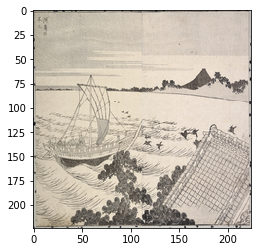

Y_original:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
###-- Check the data shape --###
print("X_original: ", X_original.shape)
# print("X_original: ", X_original[3])
###-- Check image
plt.imshow(X_original[22], cmap=cm.gray_r, interpolation='nearest')
plt.show()
###-- Check the data of Y_original(label format)
print("Y_original: ", Y_original[3])

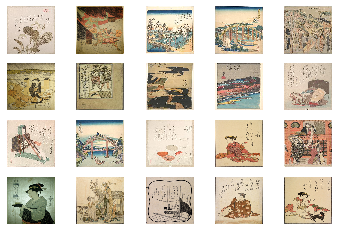

In [7]:
###-- See several image --###
cols, rows = 5, 4
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_original[i], cmap=cm.gray_r, interpolation="nearest")
    plt.axis('off')

In [0]:
###-- KFold --###
num_splits=5
from sklearn.model_selection import KFold
kf = KFold(n_splits=num_splits, shuffle=True, random_state=20200102)

i = 0
for train_idx, val_idx in kf.split(X_original):
  i = i + 1
  ###-- Set the dataset --###
  X_kfold_train, Y_kfold_train = X_original[train_idx], Y_original[train_idx]
  X_kfold_val, Y_kfold_val = X_original[val_idx], Y_original[val_idx]
  ###-- 訓練データの保存 --###
  datapath_kfold = "drive/My Drive/jupyter/ProbSpace/ukiyoe/data_kfold/"
  np.savez(datapath_kfold+"ukiyoe-dataset_kfold"+str(i)+"_train"+".npz", img=X_kfold_train, lbl=Y_kfold_train)
  np.savez(datapath_kfold+"ukiyoe-dataset_kfold"+str(i)+"_validation"+".npz", img=X_kfold_val, lbl=Y_kfold_val)


# train_idx, val_idx = list( kf.split(X_original) )[0]
# print(train_idx, val_idx)

In [0]:
# ###-- 訓練データの読み込み --###
# load_train = np.load('drive/My Drive/jupyter/ProbSpace/train-data/train-data.npz')
# load_test = np.load('drive/My Drive/jupyter/ProbSpace/train-data/test-data.npz')
# print(load_train.files)